<a href="https://colab.research.google.com/github/GoriyashKashyap/KNN_Project/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement :** There is war is going on between two countries submarine of the country is going under the water to another country and enemy country planted some mines in the oceans mine are nothing but explosive that explodes when some object comes in contact with it and there can be rocks in the ocean so submarine needs to predict whether it is crossing mine or rock our job is to make a system that can predict whether the object beneath the submarine is a mine or a rock so how this is done is submarine uses sonar signal that sends sound and receives switchbacks so this signal in the processed to detect whether the object is a mine or it's just a rock in the ocean to predict the rock and mine

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

**Import Dataset**

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("vijayaadithyanvg/rock-or-mine-classification")
print(f"Dataset downloaded to: {path}")

csv_file_name = 'ROCK_OR_MINE.csv'
csv_file_path = os.path.join(path, csv_file_name)

100%|██████████| 29.1k/29.1k [00:00<00:00, 33.1MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/vijayaadithyanvg/rock-or-mine-classification/versions/1


In [ ]:
df = pd.read_csv(csv_file_path)

display(df.head())

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


**EDA** :

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [ ]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


Check For missing Values

In [ ]:
df.isnull().sum()

,0
0.0200,0
0.0371,0
0.0428,0
0.0207,0
0.0954,0
...,...
0.0180,0
0.0084,0
0.0090,0
0.0032,0


**Check For Duplicates**

In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R


Outlier Checks

ValueError: num must be an integer with 1 <= num <= 25, not 26

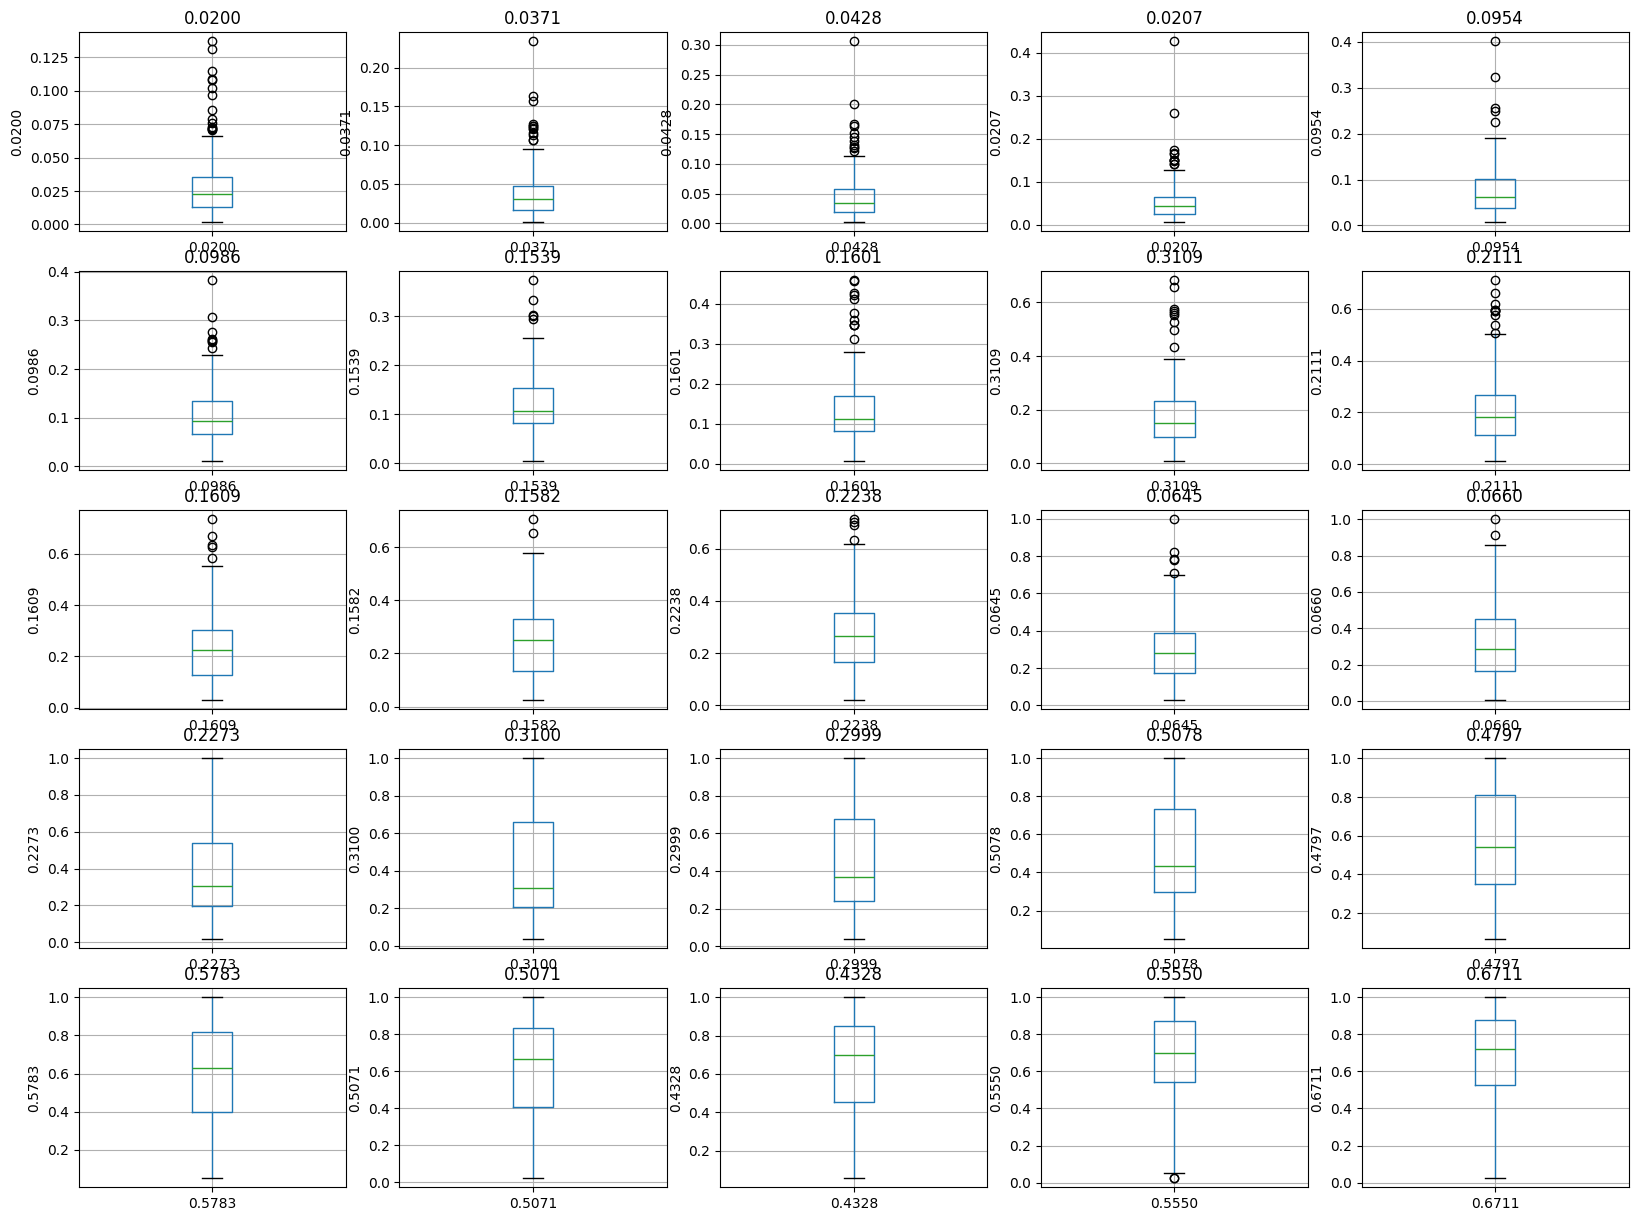

In [ ]:

plt.figure(figsize=(20, 15))
numerical_cols = df.select_dtypes(include=np.number).columns

for i, column in enumerate(numerical_cols):
    plt.subplot(5, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [ ]:
def remove_outlier(col) :
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [ ]:
for column in numerical_cols:
    lr,ur = remove_outlier(df[column])
    df[column] = np.where(df[column] < lr, lr, df[column])
    df[column] = np.where(df[column] > ur, ur, df[column])

ValueError: num must be an integer with 1 <= num <= 25, not 26

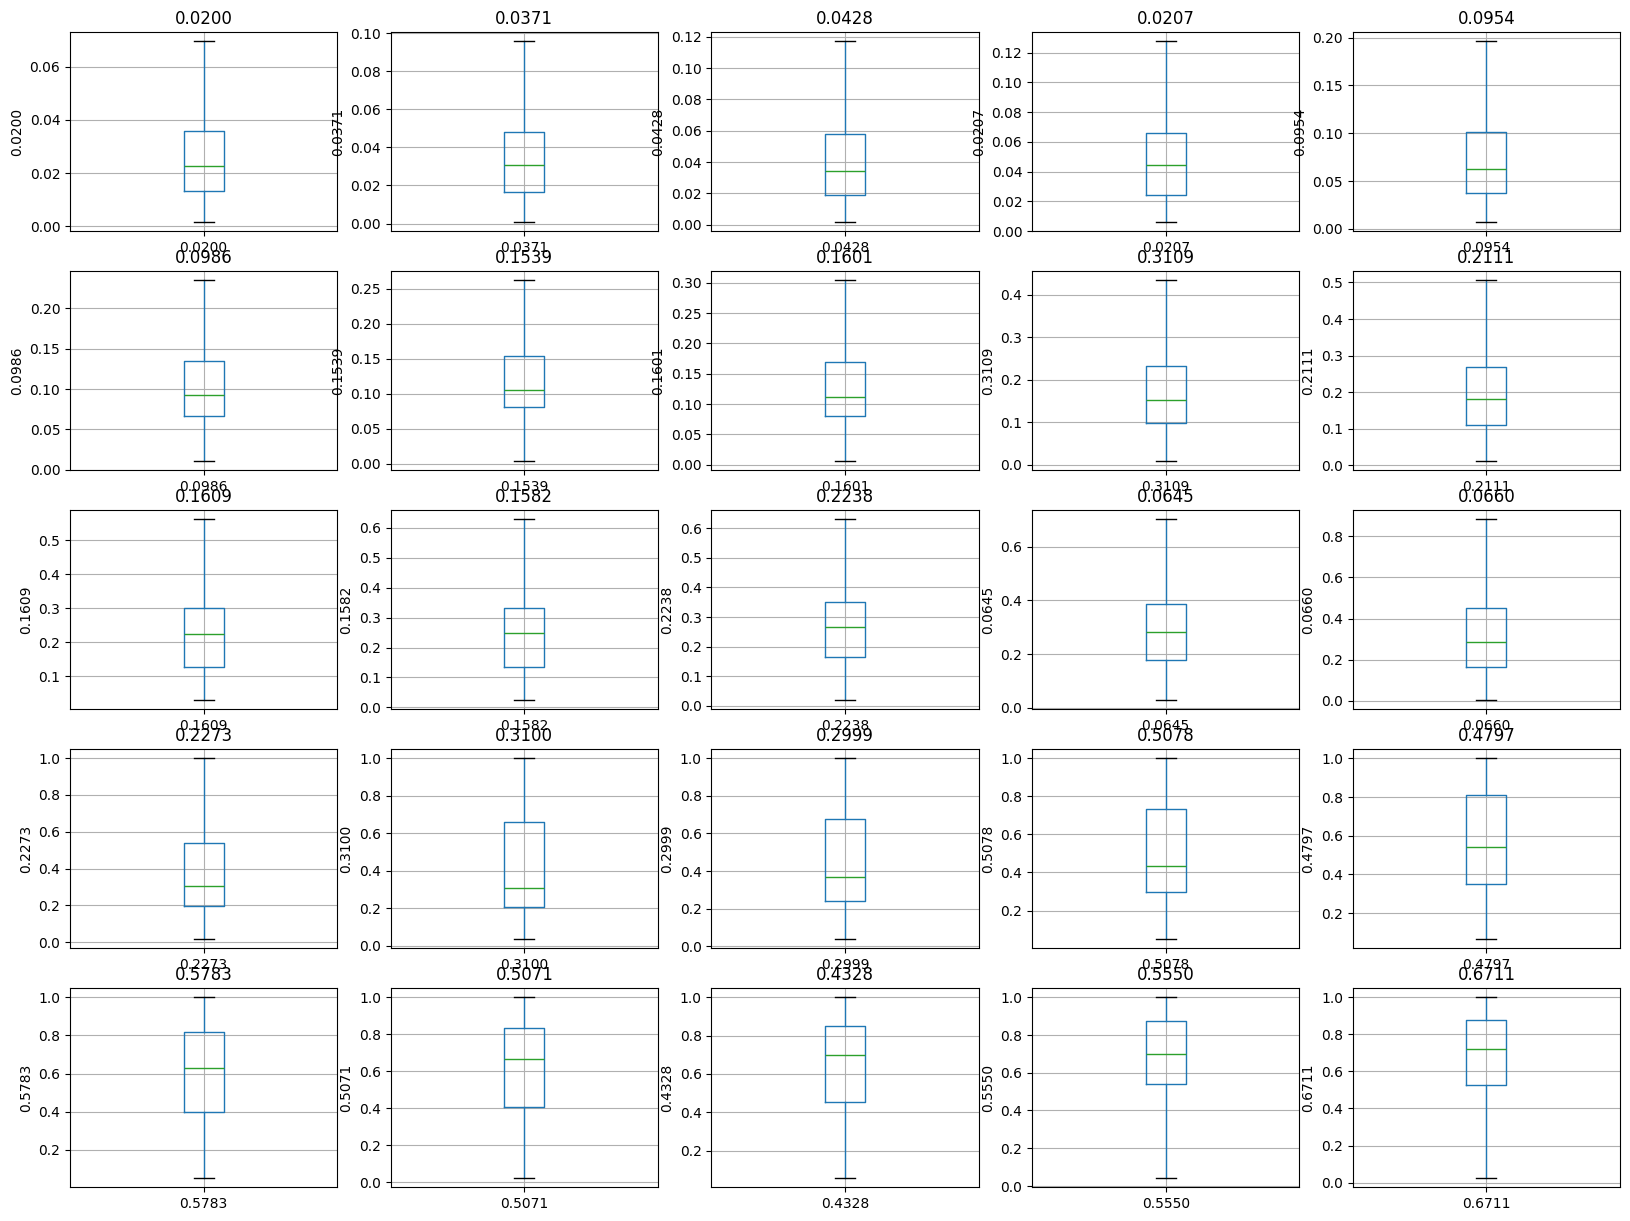

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(20, 15))
numerical_cols = df.select_dtypes(include=np.number).columns

for i, column in enumerate(numerical_cols):
    plt.subplot(5, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [ ]:
# renaming the target column
df.rename(columns = {'R':'Target'}, inplace = True)

In [ ]:
# checking the distribution of values in the target column
df.Target.value_counts()

,count
Target,
M,111
R,96


In [ ]:
# seting the features and target
X = df.iloc[:,0:60]
Y = df.iloc[:,60]

# encode the target variable to numerical values
Y = Y.map({'R': 0, 'M': 1})

Train-Test Split

In [ ]:
# spliting the data into test and train dataset.
# 20% of the whole dataset was used for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

K-Nearest Neighbors (KNN) Model

In [ ]:
# using the GridSearchCV to get the best parameters
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

knn = KNeighborsClassifier()
params = {'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
          'weights' : ['uniform', 'distance'],
          'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(knn, params, cv = 5, scoring = 'accuracy')
grid.fit(X_train_scaled, Y_train)
print(grid.best_params_)
print(grid.best_score_)

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}
0.8666666666666666


In [ ]:
# using the best parameters to create a model and predict the test data
knn =KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean', weights = 'uniform')
knn.fit(X_train_scaled, Y_train)
Y_knn = knn.predict(X_test_scaled)
print(classification_report(Y_test,Y_knn))

              precision    recall  f1-score   support

           M       0.85      0.85      0.85        27
           R       0.73      0.73      0.73        15

    accuracy                           0.81        42
   macro avg       0.79      0.79      0.79        42
weighted avg       0.81      0.81      0.81        42



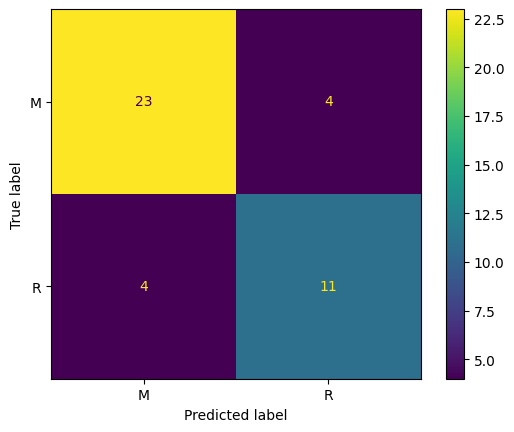

In [ ]:
# plotting the confusion matrix
cm = confusion_matrix(Y_test, Y_knn)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()